### GATHERING DATA

In [2]:
import requests
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [8]:
data = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image_predictions.csv', 'wb') as f:
    f.write(data.content)


In [9]:
image_predictions = pd.read_csv('image_predictions.csv', sep = '\t')
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [10]:
import tweepy

consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'ACCESS TOKEN'
access_secret = 'ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [11]:
api.wait_on_rate_limit = True
api.wait_on_rate_notify = True

In [ ]:
for each in twitter_archive['tweet_id']:
    data = api.get_status(each)._json
    with open('tweet_json.txt', 'a') as file:
        file.write('\n')
        file.write(str(data))

In [ ]:
failed = []
success_count = 0
for each in twitter_archive['tweet_id']:
    each = int(each)
    try:
        data = api.get_status(each, tweet_mode = 'extended')._json
        with open('tweet_json.txt', 'a') as file:
            file.write(str(data))
            file.write('\n')
        success_count += 1
        print(str(each) + ' was queried. Success count = '+str(success_count))
    except Exception as e: 
        failed.append({'id': each, 'error': e})
        print(f'Query for {each} unsuccessful. Error was {e}')
        
print('Query Completed')

In [ ]:
success_count

In [ ]:
len(failed)

In [ ]:
import json
import ast

df_list = []
with open('tweet_json.txt', 'r') as f:
    line = f.readline()
    while line:
        data = ast.literal_eval(line)
        tweet_id = data['id']
        fav_count = data['favorite_count']
        ret_count = data['retweet_count']
        df_list.append({'tweet_id': tweet_id, 'favorite_count': fav_count, 'retweet_count': ret_count, 'hashtags': hashtags})
        line = f.readline()


In [ ]:
df = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
df.head()


In [ ]:
failed_df = pd.DataFrame(failed, columns = ['id', 'error'])
failed_df

In [ ]:
df.to_csv('retweet_favorite.csv', index = False)

In [ ]:
failed_df.to_csv('failed_queries.csv', index = False)

# Assessing Data

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image_predictions.csv', sep='\t')
fav_retweet_counts = pd.read_csv('retweet_favorite.csv')

In [4]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
pd.set_option('display.max_colwidth', -1)
twitter_archive[['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
602,798644042770751489,RT @dog_rates: This is Paull. He just stubbed his toe. 10/10 deep breaths Paull https://t.co/J5Mqn8VeYq,10,10,Paull,None,None,None,None
1253,710833117892898816,Say hello to Sora. She's an Egyptian Pumpernickel. Mesmerizing af. 12/10 would bring home to mom https://t.co/PmTR4kxZkq,12,10,Sora,None,None,None,None
2160,669567591774625800,Meet Kollin. He's a Parakeetian Badminton from Denmark. Great artist. Taking break from research. Loves wicker 9/10 https://t.co/XPLB3eoXiX,9,10,Kollin,None,None,None,None
1556,688828561667567616,Say hello to Brad. His car probably has a spoiler. Tan year round. Likes your insta pic but doesn't text back. 9/10 https://t.co/dfCCK3tWfr,9,10,Brad,None,None,None,None
2180,669000397445533696,Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/ixcuUYCbdD,11,10,Terrance,None,None,None,None
1786,677573743309385728,This is Sandy. He's sexually confused. Thinks he's a pigeon. Also an All-American cheese catcher. 10/10 so petable https://t.co/Htu8plSqEu,10,10,Sandy,None,None,None,None
955,751598357617971201,This is Toby. A cat got his tongue. 13/10 adorable af https://t.co/fHQrBKYSLC,13,10,Toby,None,None,None,None
396,825147591692263424,This is Sweet Pea. She hides in shoe boxes and waits for someone to pick her. Then she surpuprises them. 13/10 https://t.co/AyBEmx56MD,13,10,Sweet,None,None,None,None
1692,681302363064414209,This is Chuck. He's a neat dog. Very flexible. Trapped in a glass case of emotion. Devastatingly unfluffy 3/10 https://t.co/YqbU9xHV3p,3,10,Chuck,None,None,None,None
1686,681610798867845120,*collapses* 12/10 https://t.co/C7M8mnzHIK,12,10,None,None,None,None,None


In [ ]:
twitter_archive.iloc[433]['expanded_urls']

In [ ]:
twitter_archive[twitter_archive.duplicated()]
image_predictions[image_predictions.duplicated()]
fav_retweet_counts.duplicated().sum()

In [ ]:
twitter_archive.rating_denominator.value_counts()

In [ ]:
image_predictions.info()

In [ ]:
twitter_archive.query('name == "None"').sample(40)

In [ ]:
twitter_archive[['text', 'rating_numerator']].sample(50)

In [ ]:
twitter_archive['rating_denominator'].value_counts()

In [ ]:
non_10 = twitter_archive[twitter_archive['rating_denominator'] != 10]
non_10[['text', 'rating_denominator']]

Check the demoninator values which are not 10, to make sure that they are properly converted from the tweet text. Some of them are incorrect: 

index = [411, 996, 2046]

## Tidiness

- All tables should be merged into one singular table 
- Dog stage can be grouped into one column. Currently represented by four separate columns in the `twitter_archive`. 

## Quality

- Source url can be cleaned to remove HTML tags, should just say 'Twitter for iPhone
- Timestamp in `twitter_archive` should be timestamp format, not string
- Dog stage should be in category format 

- Dog names not extracted property for the phrase ('name is') or ('named').
- Some dogs were accidentally called 'a'. Replace those names with NaN.
- Replace 'None' in name column with NaN

- Decimal ratings in the tweet text should be represented as floats with decimals in the rating_numerator column
- Some ratings contain multiple dd/dd format text. Need to only keep the relevant one as the rating. 

- Some tweets have been deleted (saved in `failed_queries`), and should be removed from the other dataframes
- Only want original ratings and no retweets / replies.


# Cleaning Data 

## Tidiness

###  *Define*

Dog stage can be grouped into one column. Currently represented by four separate columns in the `twitter_archive`. 

Create a new dog_stage column by extracing the terms from the text, and then dropping the four original columns. 

If the text has more than one dog stage, the dog_stage column should say 'combined'

### *Code*

In [36]:
twitter_archive_clean = twitter_archive.copy()

In [ ]:
def find_stage(x):
    stages = re.findall(r'(doggo|floofer|pupper|puppo)', x)
    if len(stages) == 0:
        return np.nan
    elif len(stages) == 1:
        return stages[0]
    elif len(stages) > 1:
        return 'multiple'
    
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].apply(find_stage)


twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1,
                           inplace=True)


### *Test*

In [44]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2295,667119796878725120,NaN,NaN,2015-11-18 23:18:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gabe. He is a southern Baklava. Gabe has always wanted to fit in with the other bananas. 10/10 fabulous https://t.co/3LZrJzg3BJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667119796878725120/photo/1,10,10,Gabe,NaN
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,puppo
1192,717790033953034240,NaN,NaN,2016-04-06 19:04:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Here's a badass mystery pupper. You weren't aware that you owe him money, but you do. 10/10 shades sick af https://t.co/fv9e9AtzSG",NaN,NaN,NaN,https://twitter.com/dog_rates/status/717790033953034240/photo/1,10,10,None,pupper
1648,683773439333797890,NaN,NaN,2016-01-03 22:14:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Buddy. He's gaining strength. Currently an F4 tornado with wind speeds up to 260mph. Very devastating. 9/10 https://t.co/qipZbshNsR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683773439333797890/photo/1,9,10,Buddy,NaN
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He's a West Congolese Bugaboop Snuggle. Rather exotic. Master of the head tilt. 12/10 would pay to pet https://t.co/2jwxxtNzoN,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/789137962068021249/photo/1,https://twitter.com/dog_rates/status/789137962068021249/photo/1,https://twitter.com/dog_rates/status/789137962068021249/photo/1",12,10,Bo,NaN


In [45]:
twitter_archive_clean.query('tweet_id == 855851453814013952')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,multiple


###  *Define*

Remove retweets and replies by removing all rows which are non-null in the retweeted_status_id or in_reply_to_status_id columns. 

### *Code*

In [46]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull() == True]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull() == True]


### *Test*

In [47]:
twitter_archive_clean[twitter_archive_clean['retweeted_status_user_id'].isnull() == False]



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [48]:
twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [49]:
twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


###  *Define*

All tables should be merged into one singular table. This means that the `fav_retweet_counts` and `image_predictions` should be a part of the `twitter_archive` df. 

Merge the `twitter_archive` df with the `fav_retweet_counts` df using an inner merge on the tweet_id. Do the same with `image_prediction`. Save the overall data frame as a new df called `twitter_archive_master`.



### *Code*

In [50]:
fav_retweet_clean = fav_retweet_counts.copy()
twitter_archive_clean = pd.merge(twitter_archive_clean, fav_retweet_clean, how = 'inner', on = 'tweet_id')

In [52]:
image_predictions_clean= image_predictions.copy()
twitter_archive_master = pd.merge(twitter_archive_clean, image_predictions_clean, how = 'inner', on = 'tweet_id')

### *Test*

In [53]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Quality

###  *Define*

The 'source' column in twitter_archive_master should not have the HTML tags. Remove the HTMl tags using regex extraction, and save the text string into the same column. 

### *Code*

In [54]:
twitter_archive_master['source'] = twitter_archive_master['source'].str.extract('>(.+)<')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


### *Test*

In [55]:
twitter_archive_master['source'].value_counts()

Twitter for iPhone    1931
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

###  *Define*

The timestamp column in the `twitter_archive_master` dataframe should be in datetime format. Convert the column by saving the column astype(timestamp)

### *Code*

In [56]:
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])
                                                     

### *Test*

In [57]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 27 columns):
tweet_id                      1969 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1969 non-null datetime64[ns]
source                        1969 non-null object
text                          1969 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1969 non-null object
rating_numerator              1969 non-null int64
rating_denominator            1969 non-null int64
name                          1969 non-null object
dog_stage                     322 non-null object
favorite_count                1969 non-null int64
retweet_count                 1969 non-null int64
jpg_url                       1969 non-null object
img_num                       1969 

###  *Define*

The dog_stage column should be converted into category format, from its current object format. 

### *Code*

In [58]:
twitter_archive_master['dog_stage'] = twitter_archive_master['dog_stage'].astype('category')

### *Test*

In [59]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 27 columns):
tweet_id                      1969 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1969 non-null datetime64[ns]
source                        1969 non-null object
text                          1969 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1969 non-null object
rating_numerator              1969 non-null int64
rating_denominator            1969 non-null int64
name                          1969 non-null object
dog_stage                     322 non-null category
favorite_count                1969 non-null int64
retweet_count                 1969 non-null int64
jpg_url                       1969 non-null object
img_num                       196

###  *Define*

- Dog names not extracted property for the phrase ('name is') or ('named'). Write a regular expression for the text containing those phrases, and save the extracted name into the name column of the dataframe

### *Code*

In [60]:
name_is = twitter_archive_master[twitter_archive_master.text.str.contains('name is')]


In [61]:
name_is.index

Int64Index([133, 618, 1326, 1378, 1881, 1901, 1926], dtype='int64')

In [62]:
text = twitter_archive_master.at[138, 'text']
text2 = re.findall(r'name\s+is\s+(\w+)', text)
print(text2)

[]


In [63]:
for i in name_is.index:
    try: 
        text = twitter_archive_master.at[i, 'text']
        dog_name = re.findall(r'name\s+is\s+(\w+)', text)[0]
        print(dog_name)
        twitter_archive_master.at[i, 'name'] = dog_name
    except:
        continue

Zoey
Zoey
Thea
Sabertooth
Big
Daryl
Rocky


In [64]:
named_index = twitter_archive_master[twitter_archive_master.text.str.contains('named ')]

In [65]:
for i in named_index.index:
    try:
        text = twitter_archive_master.at[i, 'text']
        name = re.findall(r'named\s(\w+)', text)[0]
        print(name)
        twitter_archive_master.at[i, 'name'] = name
    except:
        continue

Wylie
Kip
Jacob
Rufus
Spork
Cherokee
Hemry
Alphred
Alfredo
Zeus
Leroi
Berta
Chuk
Guss
Alfonso
Cheryl
Jessiga
Klint
Tickles
Kohl
Pepe
Octaviath
Johm


### *Test*

In [66]:
twitter_archive_master[twitter_archive_master.text.str.contains('name is')][['text', 'name']]

,text,name
133,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,Zoey
618,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,Zoey
1326,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,Thea
1378,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,Sabertooth
1881,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,Big
1901,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,Daryl
1926,This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,Rocky


In [67]:
twitter_archive_master[twitter_archive_master.text.str.contains('named ')][['text', 'name']]

,text,name
1484,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,Wylie
1577,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,Kip
1656,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,Jacob
1686,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,Rufus
1736,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,Spork
1745,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,Cherokee
1748,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,Hemry
1766,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,Alphred
1780,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,Alfredo
1785,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,Zeus


###  *Define*

Replace 'None' in name column with NaN. Some dogs also have 'a' or 'an' as a name due to faulty regex. Replace those values with NaN using .replace.

###  *Code*

In [68]:
twitter_archive_master.name.replace('None', np.nan, inplace = True)
twitter_archive_master.name.replace('a', np.nan, inplace = True)
twitter_archive_master.name.replace('an', np.nan, inplace = True)

###  *Test*

In [69]:
twitter_archive_master.name.sample(20)

1647    Batdog 
1630    NaN    
491     NaN    
182     Tuck   
1641    just   
1369    NaN    
280     Kona   
1854    Alfie  
1191    Hazel  
955     Gary   
284     Charlie
740     NaN    
1113    Cassie 
1096    Reagan 
666     NaN    
1873    Olive  
513     Riley  
1347    Ozzie  
162     NaN    
1009    Cupcake
Name: name, dtype: object

###  *Define*

Decimal ratings in the tweet text should be represented as floats with decimals in the rating_numerator column. Recalculate the numerator column by using a regular expression on the tweet text. 


###  *Code*

In [70]:
twitter_archive_master['rating_numerator'] = twitter_archive_master['rating_numerator'].astype(float)

for i in twitter_archive_master.index:
    try:
        text = twitter_archive_master.at[i, 'text']
        numerator = re.findall(r'(\d+?\.?\d+)\/(\d+\.?\d+?)', text)[0][0]
        denominator = re.findall(r'(\d+?\.?\d+)\/(\d+\.?\d+?)', text)[0][1]
        twitter_archive_master.at[i, 'rating_numerator'] = float(numerator)
        twitter_archive_master.at[i, 'rating_denominator'] = float(denominator)
    except:
        continue

###  *Test*

In [71]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 27 columns):
tweet_id                      1969 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1969 non-null datetime64[ns]
source                        1969 non-null object
text                          1969 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1969 non-null object
rating_numerator              1969 non-null float64
rating_denominator            1969 non-null int64
name                          1412 non-null object
dog_stage                     322 non-null category
favorite_count                1969 non-null int64
retweet_count                 1969 non-null int64
jpg_url                       1969 non-null object
img_num                       1

In [72]:
twitter_archive_master[['text', 'rating_numerator', 'rating_denominator']].sample(20)

,text,rating_numerator,rating_denominator
170,This is Noosh. He noticed you were in the shower and thought you could use some company. 12/10 h*ckin loyal https://t.co/Uq3ChFgWA3,12.00,10
423,This is Chef. Chef loves everyone and wants everyone to love each other. 11/10 https://t.co/ILHGs0e6Dm,11.00,10
178,This is Cannon. He just heard something behind him. Fr*ckin frightened af. 12/10 don't look back just run https://t.co/WTPBWT6Ux1,12.00,10
1890,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,6.00,10
1032,This is Bode. He's a heavy sleeper. 9/10 https://t.co/YMkxhGWUqv,9.00,10
1490,Meet Reggie. He's going for the world record. Must concentrate. Focus up pup. 11/10 we all believe in you Reggie https://t.co/h3AWz4AzuC,11.00,10
953,I want to hear the joke this dog was just told. 10/10 https://t.co/1KiuZqqOD4,10.00,10
1442,This pups goal was to get all four feet as close to each other as possible. Valiant effort 12/10 https://t.co/2mXALbgBTV,12.00,10
670,This is Jax. He is a majestic mountain pupper. Thinks flat ground is for the weak. 12/10 would totally hike with https://t.co/KGdeHuFJnH,12.00,10
1153,When you keepin the popcorn bucket in your lap and she reach for some... 10/10 https://t.co/a1IrjaID3X,10.00,10


In [73]:
twitter_archive_master.rating_numerator.value_counts()

12.00      445
10.00      418
11.00      393
13.00      255
9.00       149
8.00       94 
7.00       51 
14.00      34 
6.00       32 
5.00       31 
3.00       19 
4.00       14 
2.00       9  
1.00       5  
60.00      1  
24.00      1  
99.00      1  
1776.00    1  
13.50      1  
11.27      1  
165.00     1  
11.26      1  
0.00       1  
84.00      1  
9.75       1  
45.00      1  
88.00      1  
144.00     1  
44.00      1  
121.00     1  
204.00     1  
50.00      1  
80.00      1  
420.00     1  
Name: rating_numerator, dtype: int64

###  *Define*

Some tweets contain multiple dd/dd format text. Keep only the most relevant one as the rating. Check for the denominators which are incorrect, and manually update the column. 

###  *Code*

In [74]:
non_10 = twitter_archive_master[twitter_archive_master['rating_denominator'] != 10]
non_10[['text', 'rating_denominator']]

,text,rating_denominator
320,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
382,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
658,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
841,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
917,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
938,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
962,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
980,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50
1044,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,50
1119,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,40


rows with wrong denominator: [411, 996, 2046]

In [75]:
twitter_archive_master.at[411, 'rating_numerator'] = 0
twitter_archive_master.at[411, 'rating_denominator'] = 0
twitter_archive_master.at[996, 'rating_numerator'] = 11.0
twitter_archive_master.at[996, 'rating_denominator'] = 10
twitter_archive_master.at[2046, 'rating_numerator'] = 9.0
twitter_archive_master.at[2046, 'rating_denominator'] = 10

###  *Test*

In [76]:
twitter_archive_master.query('index in [411, 996, 2046]')[['text', 'rating_denominator']]

,text,rating_denominator
411,Meet Sonny. He's an in-home movie critic. That is his collection. He's very proud of it. 12/10 https://t.co/yPbCALoy2n,0.0
996,Everybody stop what you're doing and watch this video. Frank is stuck in a loop. 13/10 (Vid by @klbmatty) https://t.co/5AJs8TIV1U,10.0
2046,NaN,10.0


###  *Define*

Some tweets have been deleted (saved in `failed_queries`), and should be removed from the combined dataframes. Delete the row from `twitter_archive_master` if the id is in the `failed_df`.

###  *Code*

In [80]:
failed_df = pd.read_csv('failed_queries.csv')

for each in failed_df['id']:
    deleted_id = twitter_archive_master.query(f'tweet_id == {each}').index
    twitter_archive_master.drop(deleted_id, axis = 0, inplace = True)

###  *Test*

In [81]:
for each in failed_df['id']:
    print(each in twitter_archive_master['tweet_id'])

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


## Storing Cleaned Data


In [82]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

# Analysis and Visualisation

In [83]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')


In [84]:
df = twitter_archive_master.copy()
import seaborn as sns

In [85]:
sns.set_context('paper')
sns.set_style('darkgrid')

In [86]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

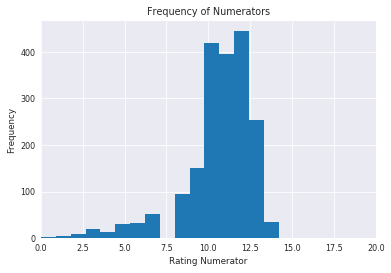

In [87]:
plt.title('Frequency of Numerators')
plt.xlim(0, 20)
plt.xlabel('Rating Numerator')
df['rating_numerator'].plot(kind= 'hist', bins = 2000);

This is a histogram of the ratings numerators. It appears that the most frequently used numerator by the account is between 10 and 12.5. 

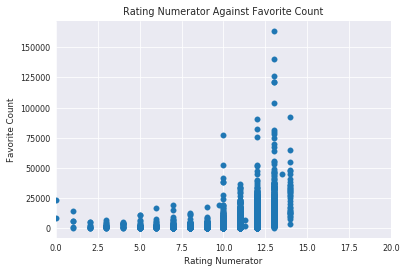

In [88]:
plt.title('Rating Numerator Against Favorite Count')
plt.xlabel("Rating Numerator")
plt.ylabel('Favorite Count')
plt.xlim(0, 20)
plt.scatter(df['rating_numerator'], df['favorite_count']);

This is a scatter plot of the favorite count against the ratings numerator. It appears that as the numerator gets higher, the tweet has a correspondingly higher favorite count. 

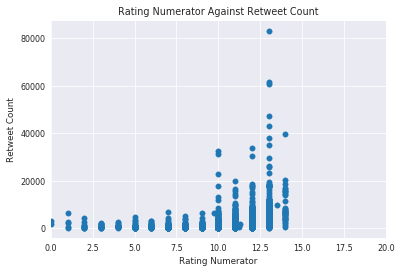

In [89]:
plt.title('Rating Numerator Against Retweet Count')
plt.xlabel("Rating Numerator")
plt.ylabel('Retweet Count')
plt.xlim(0, 20)
plt.scatter(df['rating_numerator'], df['retweet_count']);

The same is true of the retweet count

(0, 75000)

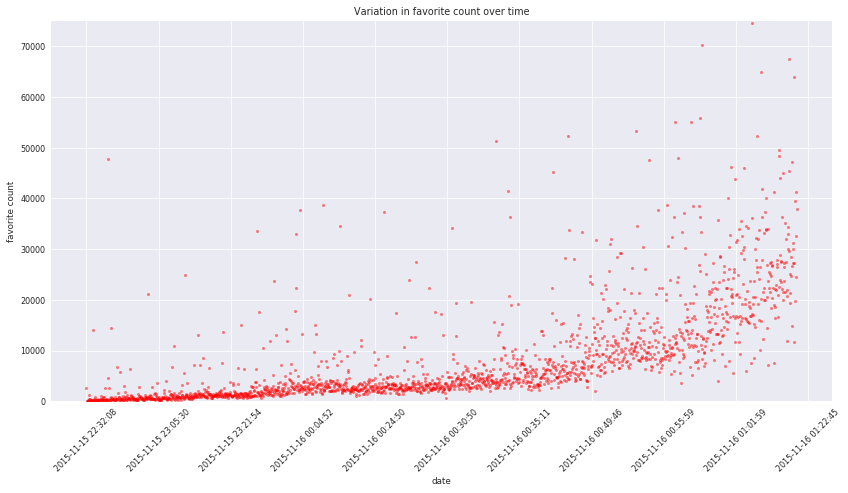

In [90]:
plt.figure(figsize = (14,7))
plt.plot_date(df.timestamp, df.favorite_count, alpha=0.5, ms=3, c='red');
plt.xlabel('date')
plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], rotation = 45)
plt.ylabel('favorite count')
plt.title('Variation in favorite count over time')
plt.ylim(0, 75000)

This is a scatter plot of the favorite count over time. It appears that as time has gone on, the number of favorites per tweet has gradually increased. This would make sense, as the page has garnered a larger followership over time, and thus would receive a higher number of favorites. 

In [ ]:
plt.figure(figsize = (14,7))
plt.plot_date(df.timestamp, df.rating_numerator)
plt.ylim(0, 15)
plt.title('Change in rating numerators over time')
plt.xlabel('Date')
plt.ylabel('Rating Numerator')


This is a scatter plot of the ratings numerator over time. It appears that as time has gone on, the average ratings numerator has gradually increased. 

In [92]:
dog_breeds = df.groupby('p1').mean()
dog_breeds.reset_index(inplace= True)
dog_breeds.head()

,p1,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
0,Afghan_hound,8.041621e+17,NaN,NaN,NaN,NaN,NaN,9.666667,10.0,16502.666667,5613.666667,1.000000,0.433959,0.099034,0.081651
1,African_crocodile,6.746648e+17,NaN,NaN,NaN,NaN,NaN,10.000000,10.0,944.000000,264.000000,1.000000,0.330625,0.075356,0.057481
2,African_grey,7.623165e+17,NaN,NaN,NaN,NaN,NaN,11.000000,10.0,5085.000000,1212.000000,1.000000,0.270468,0.076187,0.033306
3,African_hunting_dog,6.711633e+17,NaN,NaN,NaN,NaN,NaN,8.000000,10.0,1681.000000,1133.000000,1.000000,0.733025,0.119377,0.026983
4,Airedale,7.184489e+17,NaN,NaN,NaN,NaN,NaN,9.833333,10.0,5041.000000,1306.750000,1.166667,0.583771,0.129887,0.083516


In [94]:
dog_breeds = df.groupby('p1').count()


ERROR! Session/line number was not unique in database. History logging moved to new session 3


In [95]:
dog_breeds.sort_values('tweet_id', ascending = False, inplace = True)
dog_breeds.reset_index(inplace = True)

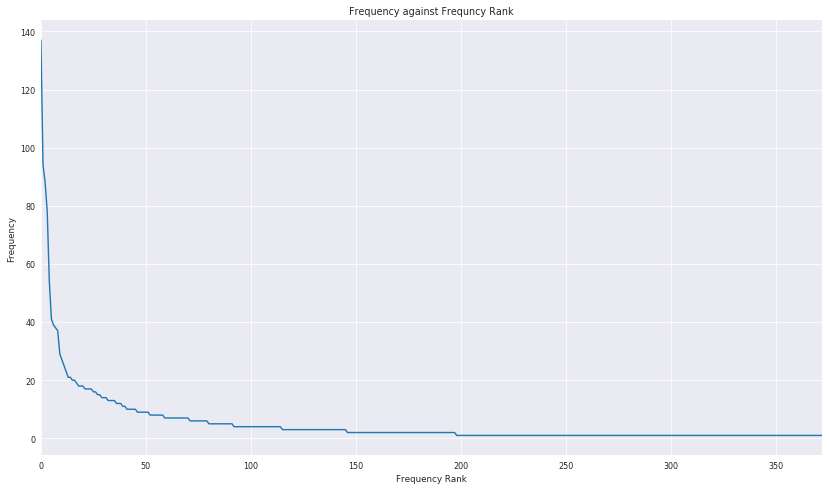

In [96]:
plt.figure(figsize = (14,8))
plt.title('Frequency against Frequncy Rank')
plt.xlabel('Frequency Rank')
plt.ylabel('Frequency')
dog_breeds['tweet_id'].plot()

In [97]:
dog_breeds['tweet_id_log'] = np.log(dog_breeds['tweet_id'])
dog_breeds['rank'] = dog_breeds.index + 1
dog_breeds['rank_log'] = np.log(dog_breeds['rank'])

Text(7.243,0.5,'Frequency Log')

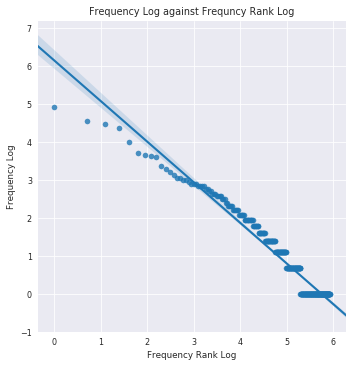

In [98]:
sns.lmplot('rank_log', 'tweet_id_log', dog_breeds)
plt.title('Frequency Log against Frequncy Rank Log')
plt.xlabel('Frequency Rank Log')
plt.ylabel('Frequency Log')

In [99]:
top_20 = int(round(dog_breeds['p1'].count() * 0.2))
print(top_20)

75


In [100]:
total = 0
for each in range(top_20):
    total += dog_breeds.iloc[each]['tweet_id']
    
print(total)

1415


In [101]:
print(len(df))
ratio = total / len(df)
print(ratio)

1970
0.718274111675


There appears to be an inverse relationship between the frequency of a dog breed's appearance, and the frequency rank of that particular breed. When you set both axes to log, then an almost linear relationship appears. This is a manifestation of zipf's law, which, in the application of linguistics, that the frequency of a word is inversely proportional to its rank in the frequency table. 

This is also evidence of the pareto principle: that for many events, roughly 80% of the effects come from 20% of the causes. Based on the calculations, the top 20% most frequently occuring dog breeds (75 breeds), accounts for about 72% of all the dog images (1415 / 1970), which is not far off from the 80% predicted by the principle.